In [10]:
import pandas as pd
import matplotlib.pyplot as plt

dmf = pd.read_csv("/Users/andreamaldonado/Downloads/benchmark_features_final.csv", index_col=None)
#dmf = dmf.drop(['Unnamed: 0'], axis=1)
print(dmf.shape)
describe = dmf.describe().transpose()
print(describe[describe['max']<1].index[:19].tolist())
selected_ft = ['log', 'ratio_unique_traces_per_trace', 'ratio_most_common_variant', 'ratio_top_1_variants',
               'ratio_top_5_variants', 'ratio_top_10_variants', 'ratio_top_20_variants', 'ratio_top_50_variants',
               'ratio_top_75_variants', 'normalized_variant_entropy', 'normalized_sequence_entropy', 
               'normalized_sequence_entropy_linear_forgetting', 'normalized_sequence_entropy_exponential_forgetting']
#print(selected_ft)
ft_preselection = dmf[selected_ft]
#ft_preselection['log'] = dmf['log']
ft_preselection
# Include complexity features

(34, 178)
['ratio_unique_traces_per_trace', 'trace_len_hist2', 'trace_len_hist3', 'trace_len_hist4', 'trace_len_hist5', 'trace_len_hist7', 'trace_len_hist8', 'trace_len_hist9', 'ratio_most_common_variant', 'ratio_top_1_variants', 'ratio_top_5_variants', 'ratio_top_10_variants', 'ratio_top_20_variants', 'ratio_top_50_variants', 'ratio_top_75_variants', 'normalized_variant_entropy', 'normalized_sequence_entropy', 'normalized_sequence_entropy_linear_forgetting', 'normalized_sequence_entropy_exponential_forgetting']


log  ratio_unique_traces_per_trace   
0                               BPIC15_2                       0.995192  \
1                     BPI_Challenge_2018                       0.649570   
2                   Receipt_WABO_CoSeLoG                       0.080893   
3                               BPIC15_3                       0.957417   
4                     BPI_Challenge_2019                       0.047562   
5                      RequestForPayment                       0.012925   
6                      PrepaidTravelCost                       0.096236   
7                   DomesticDeclarations                       0.009429   
8                               BPIC15_4                       0.996201   
9                     BPI_Challenge_2012                       0.333614   
10                          Hospital_log                       0.858268   
11                              BPIC15_5                       0.997405   
12                        CoSeLoG_WABO_2                       0.998450   
13  Road_Traffic_Fine_Management_Process                       0.001536   
14          BPI_Challenge_2017_Offer_log                       0.000372   
15                Sepsis_Cases_Event_Log                       0.805714   
16                        CoSeLoG_WABO_3                       0.949402   
17    BPI_Challenge_2013_closed_problems                       0.123067   
18          BPI_Challenge_2013_incidents                       0.200026   
19                             PermitLog                       0.209200   
20                              BPIC15_1                       0.975813   
21             InternationalDeclarations                       0.116762   
22                    BPI_Challenge_2017                       0.505570   
23                    BPI2016_Complaints                       0.438053   
24                     BPI2016_Questions                       0.797427   
25              BPI2016_Werkmap_Messages                       0.002882   
26      BPI_Challenge_2013_open_problems                       0.131868   
27                        CoSeLoG_WABO_1                       0.977588   
28                        CoSeLoG_WABO_4                       0.992376   
29                        CoSeLoG_WABO_5                       0.985426   
30                         Detail_Change                       0.048444   
31              Detail_Incident_Activity                       0.496847   
32                    Detail_Interaction                       0.000041   
33                                finale                       0.049345   

    ratio_most_common_variant  ratio_top_1_variants  ratio_top_5_variants   
0                    0.002404              0.014423              0.054087  \
1                    0.026981              0.290374              0.373006   
2                    0.497211              0.497211              0.796374   
3                    0.010646              0.049681              0.090135   
4                    0.199758              0.871424              0.929990   
5                    0.437264              0.000000              0.827621   
6                    0.271081              0.419247              0.737494   
7                    0.439810              0.000000              0.862667   
8                    0.002849              0.013295              0.053181   
9                    0.262016              0.560862              0.643921   
10                   0.035871              0.103237              0.184602   
11                   0.001730              0.012111              0.051903   
12                   0.003101              0.010853              0.051163   
13                   0.375620              0.683999              0.983594   
14                   0.380626              0.000000              0.000000   
15                   0.033333              0.120000              0.215238   
16                   0.011960              0.051518              0.097516   
17                   0.33

In [11]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

scaled_dmf = scaleColumns(ft_preselection, ft_preselection.drop(['log'], axis=1).columns)
stats = ft_preselection.describe().transpose()
#stats = scaled_dmf.describe().transpose()

#print(stats.index)
stats.head()

/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_17178/3210665172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_17178/3210665172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_17178/3210665172.

count      mean       std  min       25%   
ratio_unique_traces_per_trace   34.0  0.466611  0.415471  0.0  0.057282  \
ratio_most_common_variant       34.0  0.222764  0.253617  0.0  0.011771   
ratio_top_1_variants            34.0  0.263653  0.290271  0.0  0.015581   
ratio_top_5_variants            34.0  0.425974  0.339036  0.0  0.072152   
ratio_top_10_variants           34.0  0.498102  0.340644  0.0  0.126621   

                                    50%       75%  max  
ratio_unique_traces_per_trace  0.386407  0.956895  1.0  
ratio_most_common_variant      0.110304  0.366578  1.0  
ratio_top_1_variants           0.128088  0.479785  1.0  
ratio_top_5_variants           0.428965  0.746087  1.0  
ratio_top_10_variants          0.481379  0.812674  1.0

11

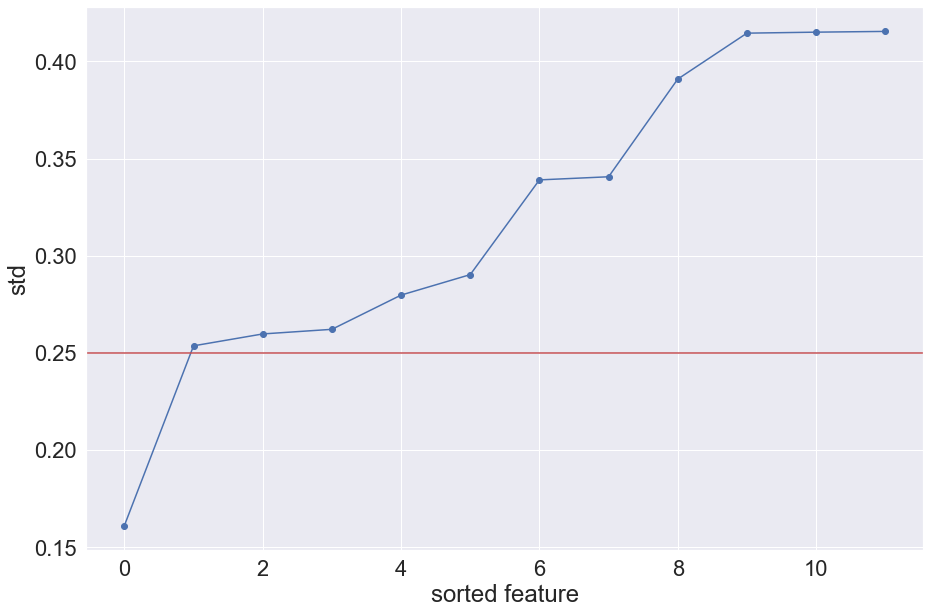

In [12]:
THRESHOLD= 0.25
stats['var'] = stats.apply(lambda x: x['std']**2, axis=1)
sorted_features = stats.sort_values("var", ascending=True)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel("sorted feature")
plt.ylabel("std")
#plt.xticks(sorted_features.index)

plt.plot(range(len(sorted_features)), sorted_features['std'], marker='o')
plt.axhline(y=0.25, color='r', linestyle='-')

filtered_feat = sorted_features[sorted_features['std']>=THRESHOLD].index
len(filtered_feat)

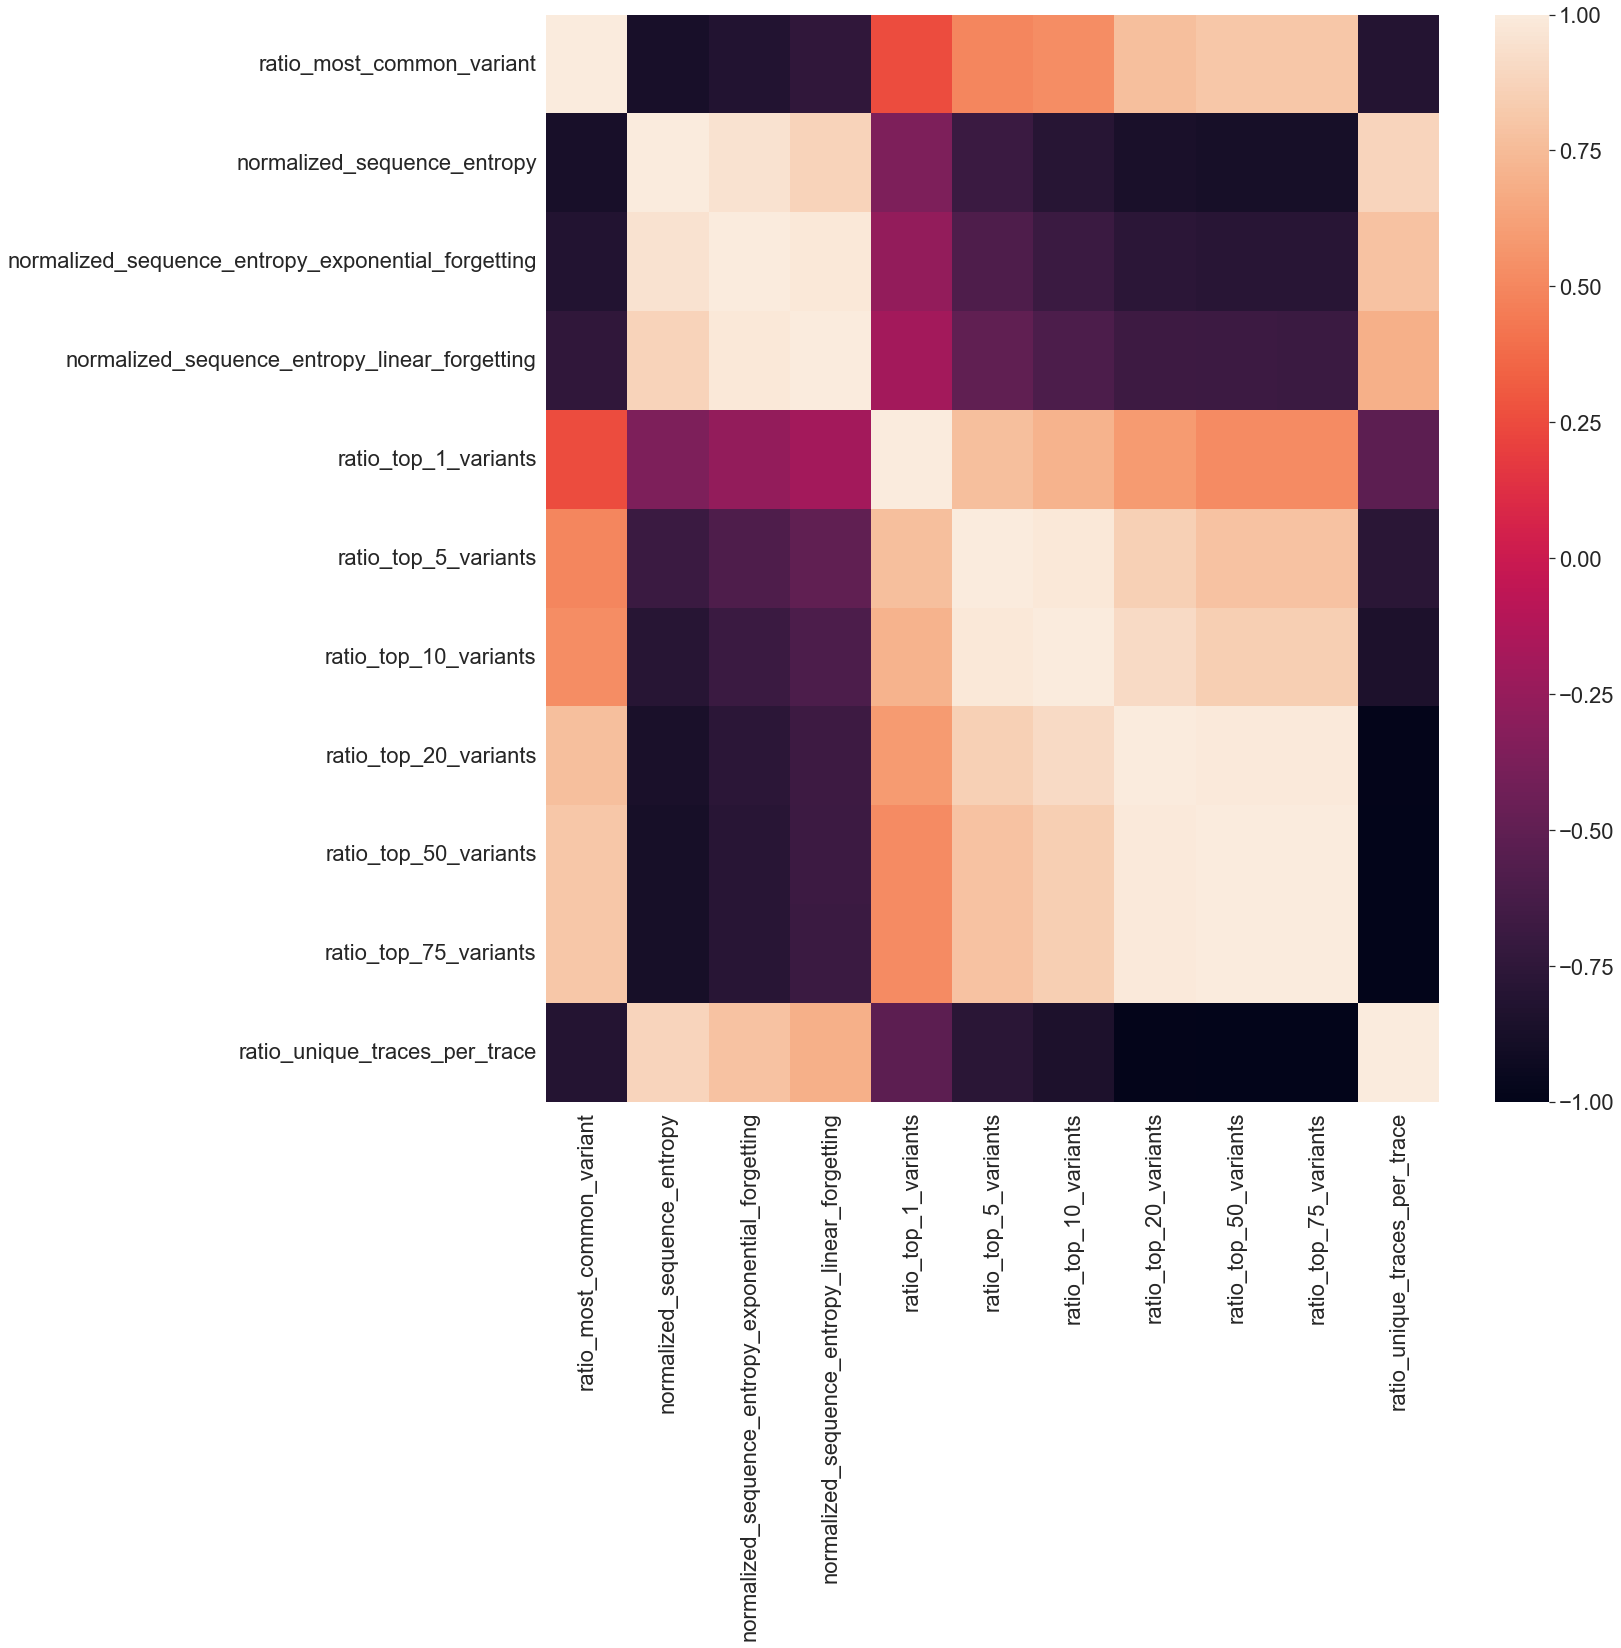

ratio_most_common_variant   
ratio_most_common_variant                                            1.000000  \
normalized_sequence_entropy                                         -0.872166   
normalized_sequence_entropy_exponential_forgetting                  -0.820146   
normalized_sequence_entropy_linear_forgetting                       -0.744763   
ratio_top_1_variants                                                 0.256647   
ratio_top_5_variants                                                 0.494400   
ratio_top_10_variants                                                0.525677   
ratio_top_20_variants                                                0.772018   
ratio_top_50_variants                                                0.809234   
ratio_top_75_variants                                                0.808176   
ratio_unique_traces_per_trace                                       -0.808280   

                                                    normalized_sequence_entropy   
ratio_most_common_variant                                             -0.872166  \
normalized_sequence_entropy                                            1.000000   
normalized_sequence_entropy_exponential_forgetting                     0.949180   
normalized_sequence_entropy_linear_forgetting                          0.867450   
ratio_top_1_variants                                                  -0.359378   
ratio_top_5_variants                                                  -0.691534   
ratio_top_10_variants                                                 -0.792878   
ratio_top_20_variants                                                 -0.866084   
ratio_top_50_variants                                                 -0.876646   
ratio_top_75_variants                                                 -0.877751   
ratio_unique_traces_per_trace                                          0.878053   

                                                    normalized_sequence_entropy_exponential_forgetting   
ratio_most_common_variant                                                                   -0.820146   \
normalized_sequence_entropy                                                                  0.949180    
normalized_sequence_entropy_exponential_forgetting                                           1.000000    
normalized_sequence_entropy_linear_forgetting                                                0.979552    
ratio_top_1_variants                                                                        -0.258761    
ratio_top_5_variants                                                                        -0.591511    
ratio_top_10_variants                                                                       -0.694187    
ratio_top_20_variants                                                                       -0.770970    
ratio_top_50_variants                                                                       -0.784374    
ratio_top_75_variants                                                                       -0.785651    
ratio_unique_traces_per_trace                                                                0.786009    

                                                    normalized_sequence_entropy_linear_forgetting   
ratio_most_common_variant                                                               -0.744763  \
normalized_sequence_entropy                                                              0.867450   
normalized_sequence_entropy_exponential_forgetting                                       0.979552   
normalized_sequence_entropy_linear_forgetting                                            1.000000   
ratio_top_1_variants                                                                    -0.192220   
ratio_top_5_variants                                                                    -0.501746   
ratio_top_10_variants                                                                   -0.598864   
r

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns



selected_per_category_highest_variance = ['ratio_unique_traces_per_trace', # simple_statistics
                                         'trace_len_hist8',# trace_length
                                         'skewness_variant_occurrence',# trace_variant
                                         'activities_mean',# activities
                                         'start_activities_kurtosis',# start_activities
                                         'end_activities_median',# end_activities
                                         'entropy_k_block_diff_1',# entropies
                                         'n_traces', 'n_unique_traces'
                                         ]
def plot_miner_correlation(input_df):
    #df = input_df.loc[:, input_df.columns.isin(selected_per_category_highest_variance)]
    df = input_df.loc[:,:]
    #df = input_df.loc[:, sorted_features]
    #df = input_df.loc[:, input_df.columns[3:]]

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.set(font_scale = 2)
    b= sns.heatmap(corr,
                ax=ax,
                vmin=-1,
                vmax=1,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    #b.set_yticklabels(b.get_yticks(), size = 15)
    plt.show()
    return corr

#scaled_dmf = scaled_dmf.drop(['log', 'Log Nature'], axis=1)
scaled_dmf = scaled_dmf[filtered_feat]
corr_df = plot_miner_correlation(scaled_dmf)
stats = stats.loc[filtered_feat]
corr_df

<AxesSubplot:xlabel='disconnection', ylabel='std'>

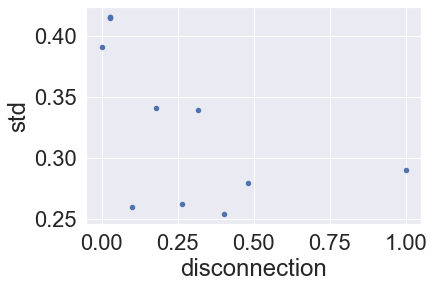

In [14]:
#feature_metrics= corr_df.loc[:,:]
feature_metrics = pd.DataFrame()
feature_metrics['disconnection'] = pd.Series(min_max_scaler.fit_transform((corr_df.abs()).sum(axis=1).to_numpy().reshape(-1, 1)).reshape(len(corr_df))).apply(lambda x: 1-x)   
#TODO: MinMaxScaler ONLY before std computation
#feature_metrics['std'] = pd.Series(min_max_scaler.fit_transform(stats['std'].to_numpy().reshape(-1, 1)).reshape(len(corr_df)))
feature_metrics['std'] = pd.Series(stats['std'].to_numpy().reshape(-1, 1).reshape(len(corr_df)))
#feature_metrics['score'] = feature_metrics.apply(lambda x: x['disconnection'], axis=1) #TODO mean or prod?
feature_metrics['score'] = feature_metrics.apply(lambda x: x.prod(), axis=1) #TODO mean or prod?
feature_metrics.index = corr_df.index
#pd.concat([feature_metrics, stats['std']], axis=1)
#feature_metrics = scaleColumns(feature_metrics, feature_metrics.columns)


feature_metrics.plot.scatter(x="disconnection", y="std")

#top_k_score = feature_metrics.sort_values(["score"], ascending=False).head(TOP_K).index[:5].tolist()
#other = ['variant_entropy', 'normalized_variant_entropy', 'sequence_entropy', 'normalized_sequence_entropy','sequence_entropy_linear_forgetting','normalized_sequence_entropy_linear_forgetting','sequence_entropy_exponential_forgetting','normalized_sequence_entropy_exponential_forgetting'] 
#selected_highest_score = top_k_score+other

                                                    disconnection       std   
ratio_top_1_variants                                 1.000000e+00  0.290271  \
normalized_sequence_entropy_linear_forgetting        4.804416e-01  0.279733   
ratio_top_5_variants                                 3.173670e-01  0.339036   
ratio_most_common_variant                            4.022142e-01  0.253617   
normalized_sequence_entropy_exponential_forgetting   2.653517e-01  0.262115   
ratio_top_10_variants                                1.782057e-01  0.340644   
normalized_sequence_entropy                          1.010703e-01  0.259735   
ratio_unique_traces_per_trace                        2.942524e-02  0.415471   
ratio_top_75_variants                                2.850613e-02  0.415087   
ratio_top_50_variants                                2.761956e-02  0.414572   
ratio_top_20_variants                                2.220446e-16  0.390934   

                                                   

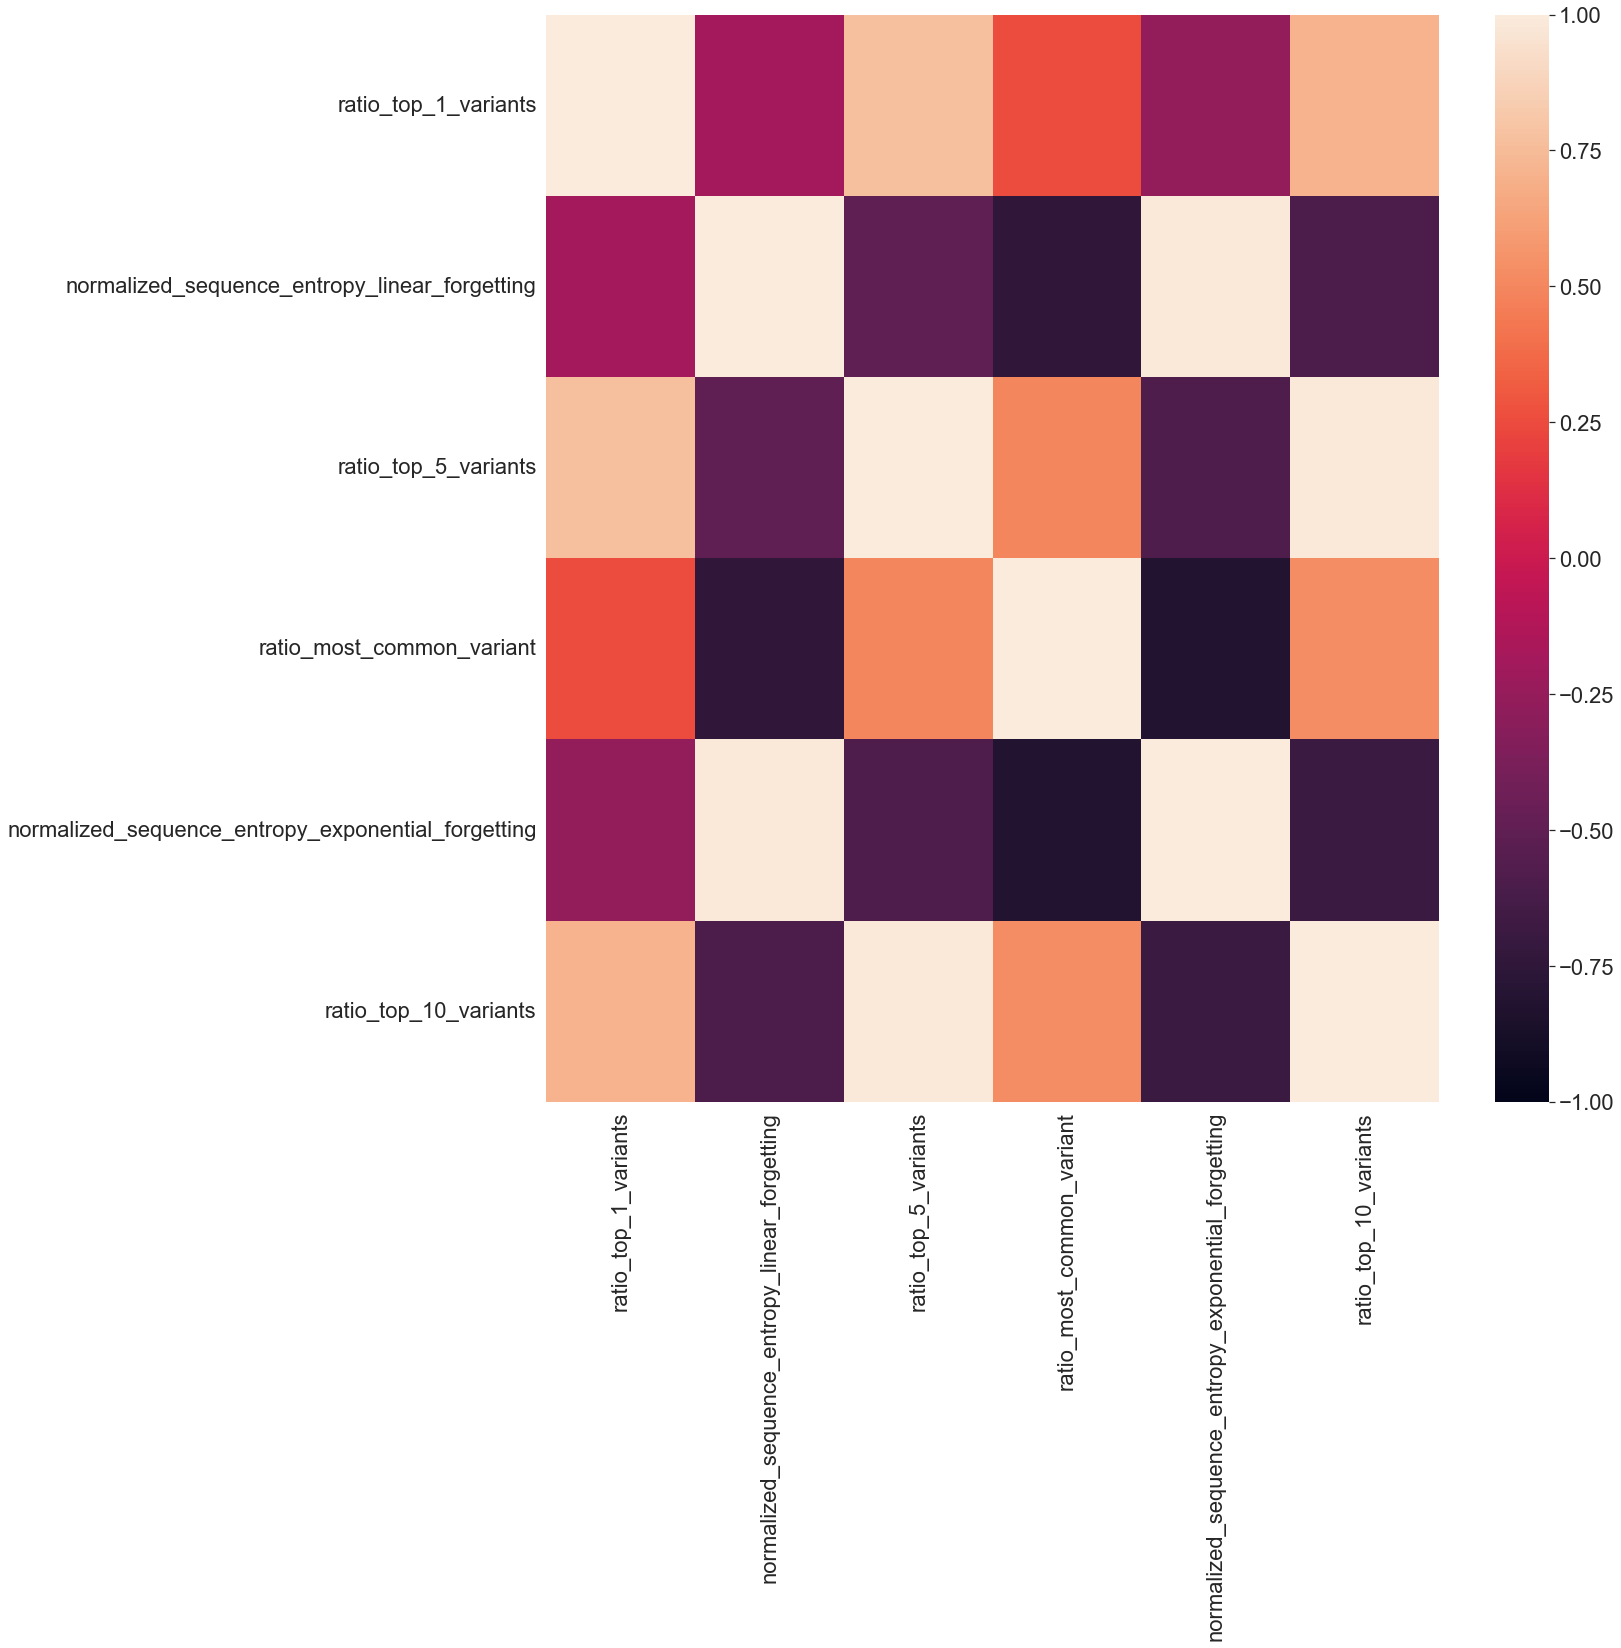

In [15]:
TOP_K = 6
selected_highest_score = feature_metrics.sort_values(["score"], ascending=False)
print(selected_highest_score)
selected_highest_score = selected_highest_score.head(TOP_K).index

feature_metrics.loc[selected_highest_score,:]
corr_sel_df = plot_miner_correlation(scaled_dmf[selected_highest_score])

In [16]:
## import numpy as np
from sklearn.impute import SimpleImputer
df= dmf.loc[:,dmf.columns.isin(selected_highest_score)]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)
imp_df = imp_mean.transform(df)
imp_df = pd.DataFrame(imp_df, columns = df.columns)
print("Before:", len(df.loc[:, df.isna().any()].columns), "columns in", len(df.loc[:, df.isna().any()]), 'rows')
print("After:", len(imp_df.loc[:, imp_df.isna().any()].columns))

Before: 2 columns in 34 rows
After: 0


/Users/andreamaldonado/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_17178/722551070.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  _ = plt.tight_layout()


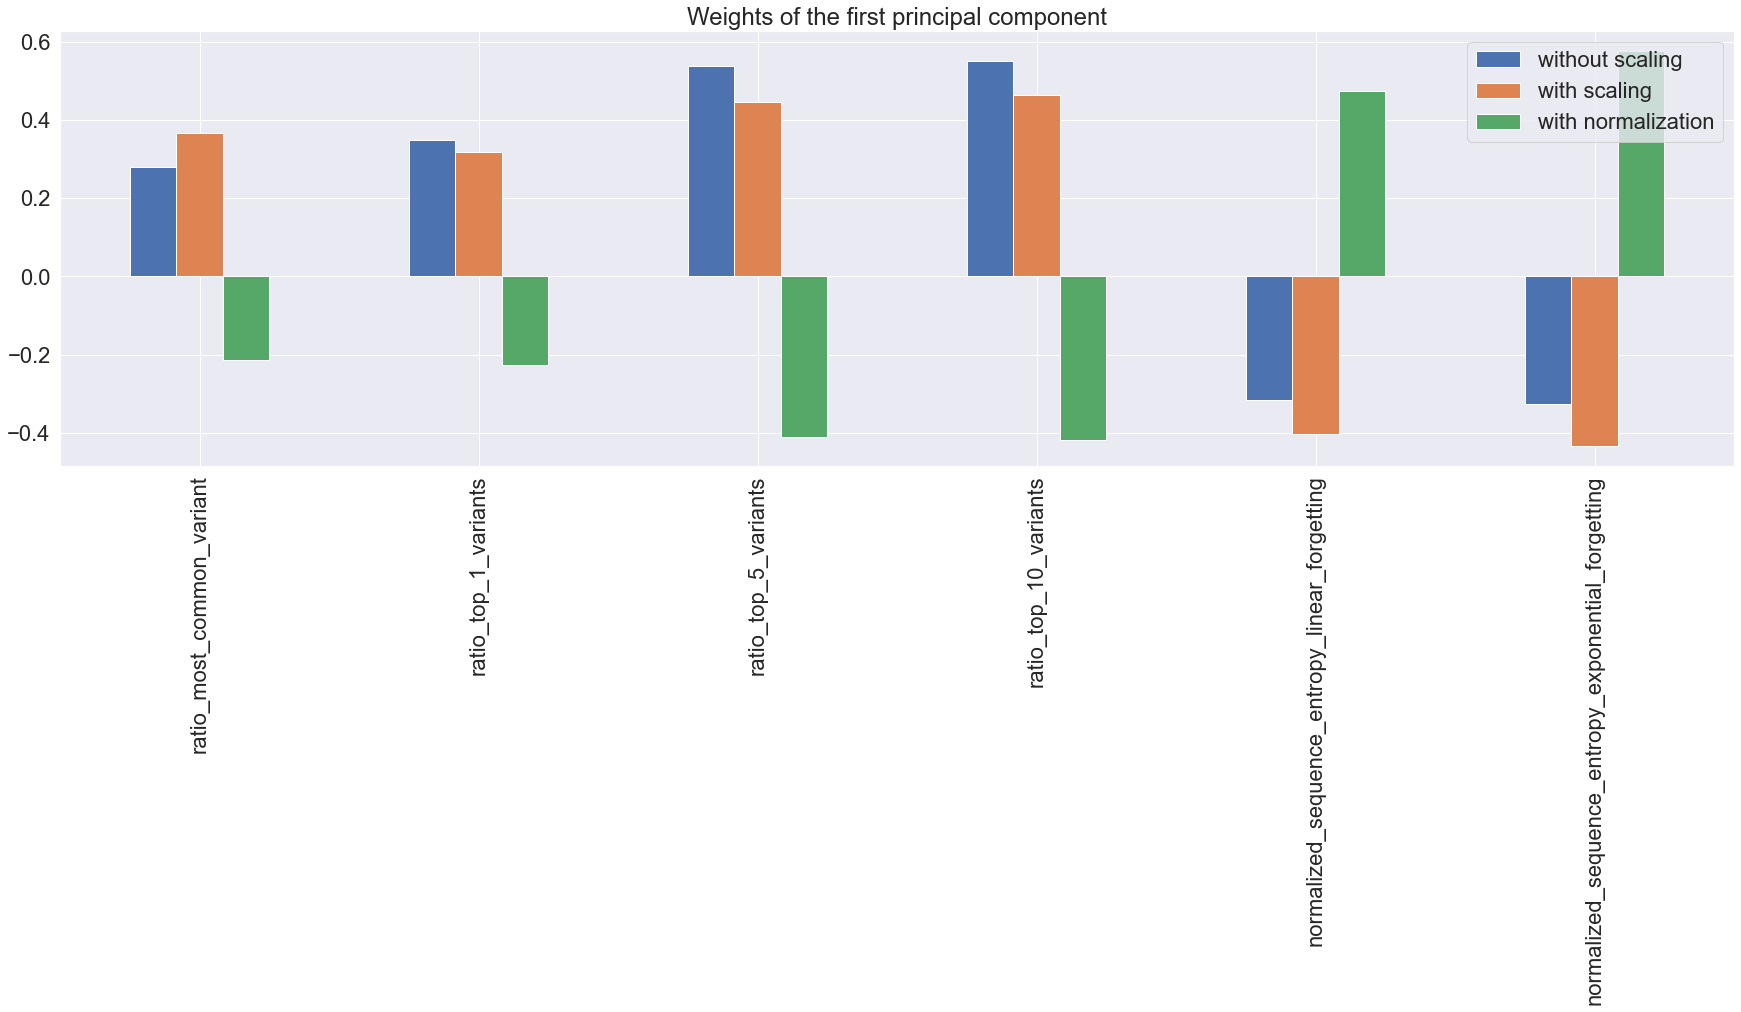

In [17]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = imp_df
scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X)
normed_X = Normalizer(norm="l2").fit_transform(X)
minmaxscaled_X = minmaxscaler.fit_transform(X)


import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(minmaxscaled_X)
minmax_pca =  PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
norm_pca = PCA(n_components=2).fit(normed_X)


X_train_transformed = pca.transform(X)
X_train_minmax_transformed = pca.transform(minmaxscaled_X)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)
X_train_norm_transformed = norm_pca.transform(normed_X)


first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component["with normalization"] = norm_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(30, 8)
)

_ = plt.tight_layout()



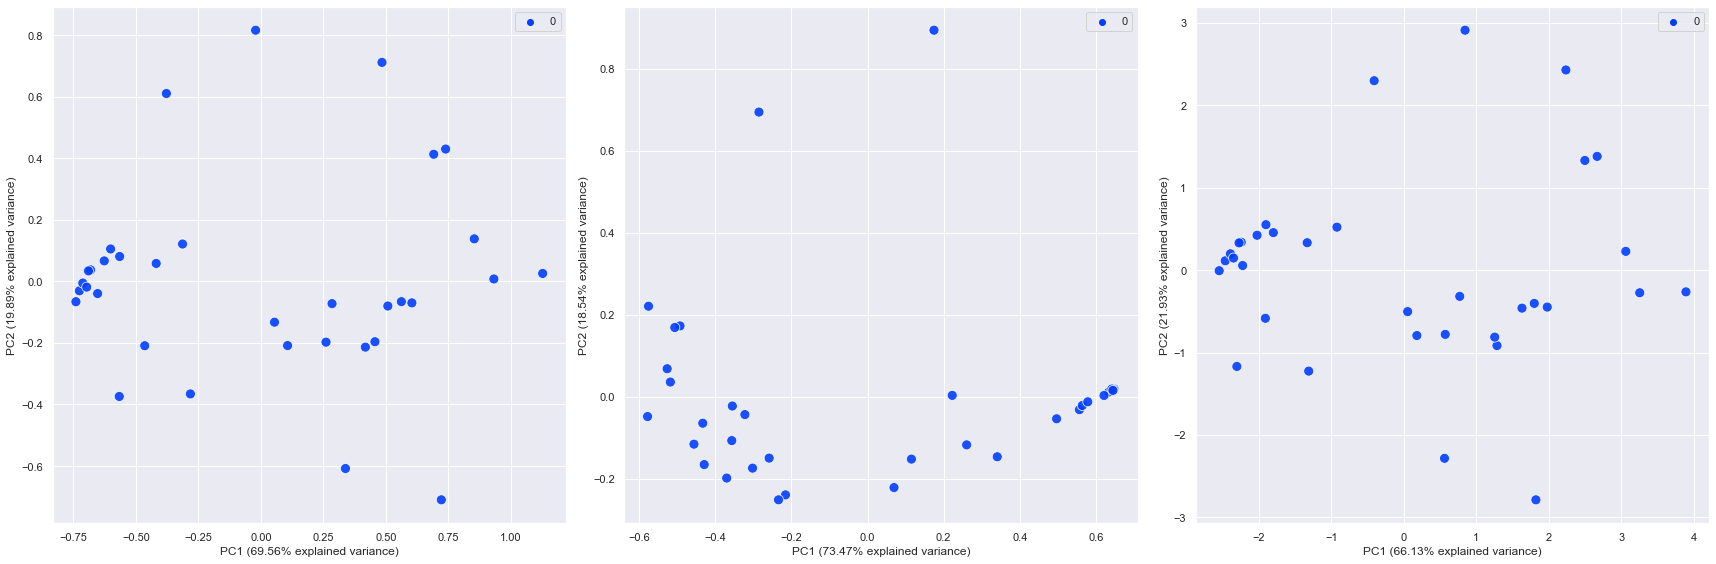

In [18]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

# Normalizer: By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. 
    # Unit norm with L2 means that if each element were squared and summed, the total would equal 1. 
    #Normalizer does transform all the features to values between -1 and 1. 
#norm_data = Normalizer(norm="l2").fit_transform(df.drop(["log"], axis=1))
norm_data = Normalizer(norm="l2").fit_transform(X)

#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
    #Unit variance means dividing all the values by the standard deviation.
scaler = StandardScaler()
sca_data = scaler.fit_transform(X)
#norm_data = Normalizer(norm="l2").fit_transform(norm_data)

sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24, 8))

#X_new = pca.fit_transform(X)
X_new = pca.fit_transform(minmaxscaled_X)
df_pca = pd.DataFrame(X_new, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax1, data=df_pca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax1.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax1.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_norm = pca.fit_transform(norm_data)
df_pca_norm = pd.DataFrame(X_new_norm, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax2, data=df_pca_norm, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax2.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax2.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_sca = pca.fit_transform(sca_data)
df_pca_sca = pd.DataFrame(X_new_sca, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax3, data=df_pca_sca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax3.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax3.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()
# plt.show()
# plt.close()

#ratio number of activities and traces... 

0.8997756887175077


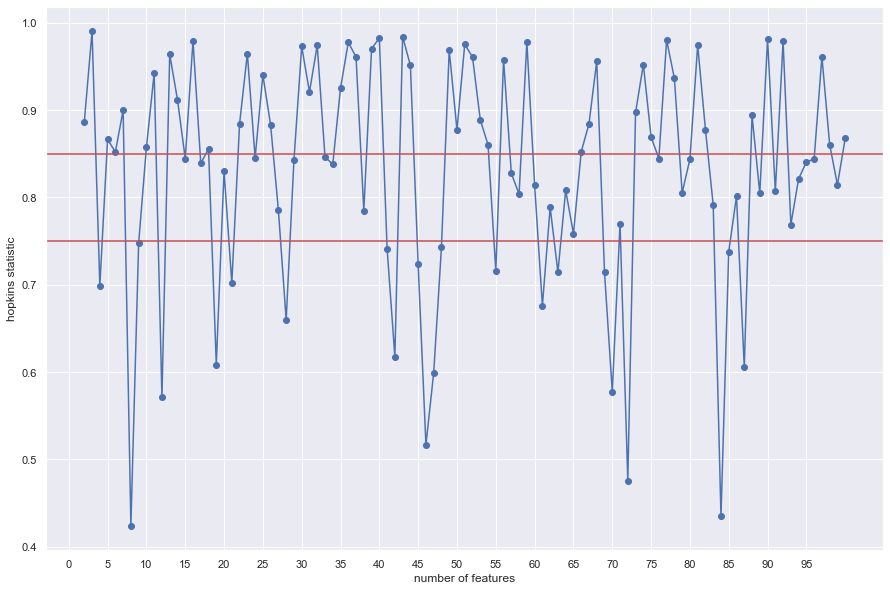

In [19]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from numpy.random import uniform
from sklearn.impute import SimpleImputer

# Clustering tendencies
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    #X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

#https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency
def hopkins_wrapper(dmf, k):
    selection = feature_metrics.sort_values(["score"], ascending=False).head(k).index
    selected_df= dmf.loc[:,dmf.columns.isin(selection)]

    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(selected_df)

    selected_df = imp_mean.transform(selected_df)

    selected_df = Normalizer(norm="l2").fit_transform(selected_df)
    return hopkins_statistic(selected_df)

print(hopkins_statistic(norm_data))

hopkins_stats = []
for k in range(99):
    hopkins_stats.append(hopkins_wrapper(dmf, k+2))

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel("number of features")
plt.ylabel("hopkins statistic")
plt.xticks(np.arange(0, 100, 5))
#ax = plt.axes()

plt.plot(np.arange(2, 101),hopkins_stats, marker='o')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.axhline(y=0.85, color='r', linestyle='-')

plt.show()